## Machine Learning Mini Project 1
## Jeba Akewak

## Problem Description


The problem that we look at is a dataset of patients treated in a cardiology department.
The dataset describes 6 properties of patients treated in a cardiology department.In this project we are asked to build a logistic regression model to predict wether a patient takes part in the rehabilitation program or not. As such, this is a regression predictive modeling problem. Input attributes include reason,Gender,age, mobility, distance and participation.

We'll be trying to predict a classification- Participated or not participated. Let's begin our understanding of
implementing Logistic Regression in Python for classification.
We'll use a "semi-cleaned" version of the data set.

In the classification problems, the response variable is categorical. The simplest case of classification is where the response variable is binary, meaning that it can only take one of two values, such as true or false. Logistic regression takes a linear combination of explanatory variables plus an intercept term just like linear regression, but then it takes the result and passes it through the logistic function. The logistic or sigmoid function is defined as:
                S(t) = 1/1 + e-t
where t is the same linear combination of variables used in linear regression. The logistic function looks like an elongated S when plotted.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
Then Import the data set given at the following link
https://www.dropbox.com/s/gkqb7rk5dc6rdzs/Data.csv?dl=0

After downloading the csv file I exported it to excel format so that it becomes easier for reading it.
Let's start by reading in the Data.xls file into a pandas dataframe.

In [78]:
df = pd.read_excel('Data.xls')
df.head()


,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,M,61.3,No car,68.7,0
1,Hospital readmission,M,85.8,Car,86.3,0
2,Hospital readmission,F,65.0,No car,46.2,1
3,Hospital readmission,F,72.5,No car,39.7,0
4,Hospital readmission,M,93.0,No car,73.3,0


In [79]:
df.dtypes

Reason            object
Gender            object
Age              float64
Mobility          object
Distance         float64
Participation      int64
dtype: object

## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!
## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

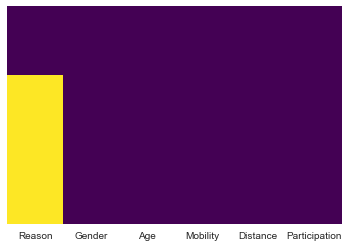

In [80]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looking at the Reason column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later.
Let's continue on by visualizing some more of the data.

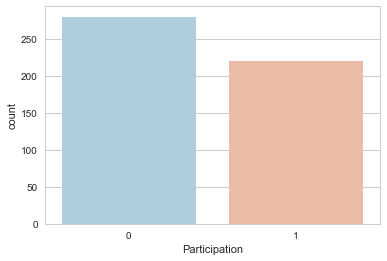

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='Participation',data=df,palette='RdBu_r')

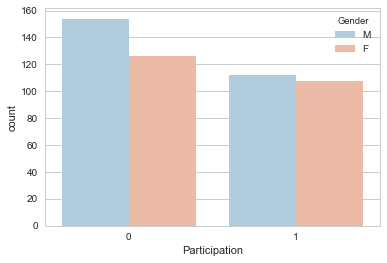

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='Participation',hue='Gender',data=df,palette='RdBu_r')

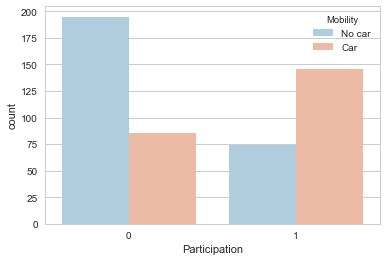

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Participation',hue='Mobility',data=df,palette='RdBu_r')

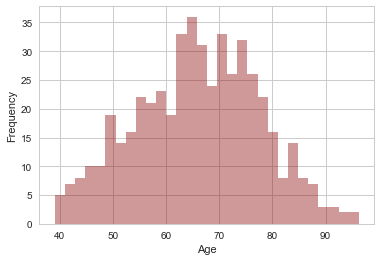

In [111]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')

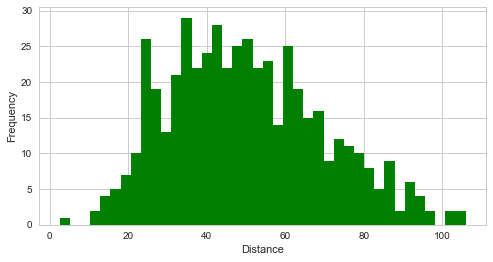

In [112]:
df['Distance'].hist(color='green',bins=40,figsize=(8,4))
plt.xlabel('Distance')
plt.ylabel('Frequency')

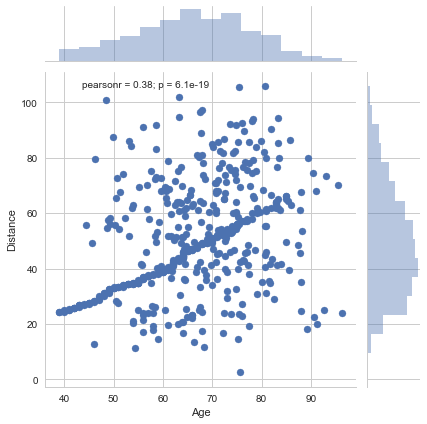

In [87]:
sns.jointplot(x='Age',y='Distance',data=df)

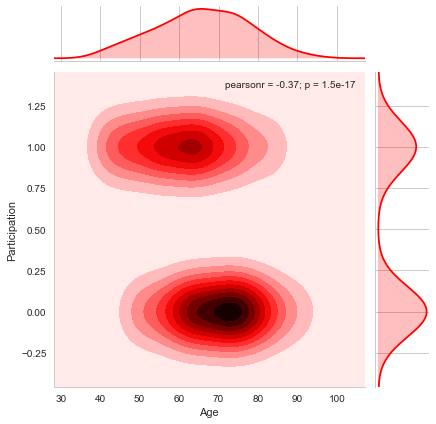

In [88]:
sns.jointplot(x='Age',y='Participation',data=df,color='red',kind='kde');

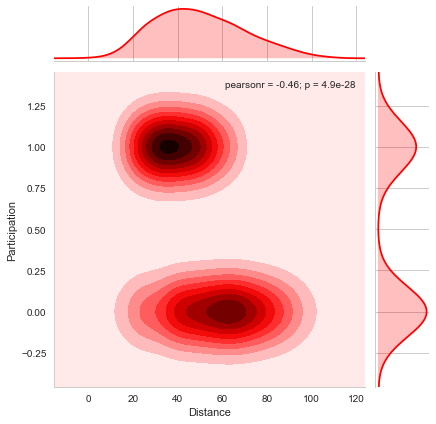

In [90]:
sns.jointplot(x='Distance',y='Participation',data=df,color='red',kind='kde');

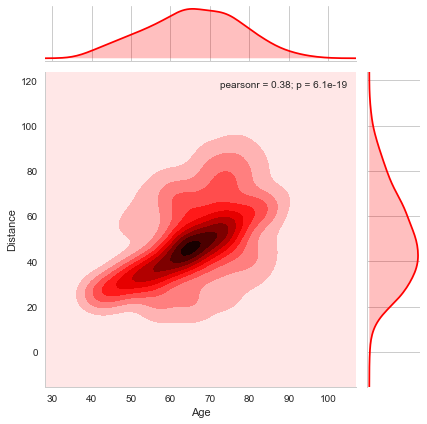

In [91]:
sns.jointplot(x='Age',y='Distance',data=df,color='red',kind='kde');

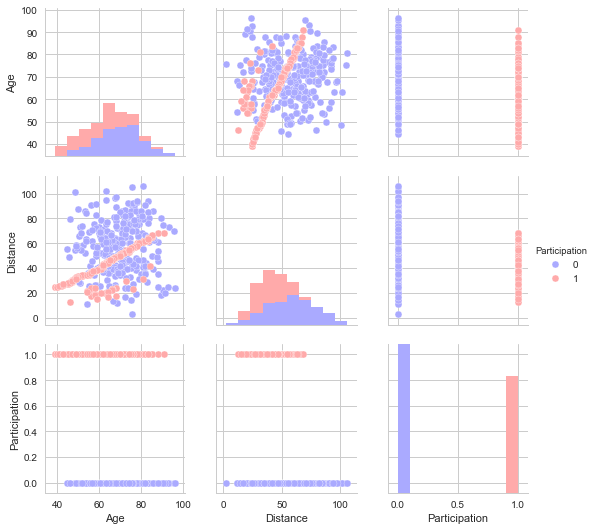

In [92]:
sns.pairplot(df,hue='Participation',palette='bwr')

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine
learning algorithm won't be able to directly take in those features as inputs.

In [93]:
gender = pd.get_dummies(df['Gender'],drop_first=True)
mobility = pd.get_dummies(df['Mobility'],drop_first=True)

In [94]:
df.drop(['Gender','Mobility','Reason'],axis=1,inplace=True)

In [95]:
df = pd.concat([df,gender,mobility],axis=1)

In [96]:
df.head()

,Age,Distance,Participation,M,No car
0,61.3,68.7,0,1,1
1,85.8,86.3,0,1,0
2,65.0,46.2,1,0,1
3,72.5,39.7,0,0,1
4,93.0,73.3,0,1,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Age              500 non-null float64
Distance         500 non-null float64
Participation    500 non-null int64
M                500 non-null uint8
No car           500 non-null uint8
dtypes: float64(2), int64(1), uint8(2)
memory usage: 12.8 KB


Our data is ready for our model.

Pearson's correlation coefficent is a measure for a linear relationship between two numerical attributes. The correlation coefficent value lies between -1 and 1. The larger the
absolute value of the coefficent is the higher the linear relationship, if it is close to 0 then the lesser they are related to each other.

In [98]:
corr_pearson = df.corr('pearson')
corr_pearson

,Age,Distance,Participation,M,No car
Age,1.000000,0.383263,-0.368875,0.043913,0.118585
Distance,0.383263,1.000000,-0.463804,0.068119,-0.016538
Participation,-0.368875,-0.463804,1.000000,-0.040697,-0.358500
M,0.043913,0.068119,-0.040697,1.000000,0.047370
No car,0.118585,-0.016538,-0.358500,0.047370,1.000000


From the above correlation table we can see that distance has the highest correlation coefficient which is 0,463804.And this shows transportation assistance is likely to make the most impact.

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set. we divide the data set into X_train, X_test, Y_train, Y_test. Here we used the test size to be 20% while the train size to be 80%.

In the logistic regression, the output is interpreted as a probability: the probability that an observation belongs to the second of the two categories being modeled. When the linear combination of variables produces positive numbers, the resulting probability is greater than 0.5 and when it produces negative numbers, the probability is less than 0.5.



In [99]:
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4]
Y = dataset[:,4]

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size
= 0.2, random_state = 0)

## Training and Predicting

In [101]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
print(logmodel.coef_)

[[ 0.02143639 -0.0287562  -1.80116715  0.14638249]]


In [103]:
predictions = logmodel.predict(X_test)

## Compute precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in Y_test.

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.70      0.70      0.70        47
        1.0       0.74      0.74      0.74        53

avg / total       0.72      0.72      0.72       100



#### Interpretation: 

Of the entire test set, 72% of the participated in the rehablitation. Of the entire test set, 72% of the customer's preferred to participate in the rehablitation.

We can also get the accuracy of a model using the scikit-learn model.score () function:

Overall Prediction accuracy is just one of many quantities you can use to evaluate a classification model. Oftentimes accuracy is not the best metric for assessing a model.

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, predictions)
print(confusion_matrix)

[[33 14]
 [14 39]]


The result is telling us that we have 33+39 correct predictions and 14+14 incorrect predictions.

#### Accuracy

In [107]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test,Y_test)))

Accuracy of logistic regression classifier on test set: 0.72


### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

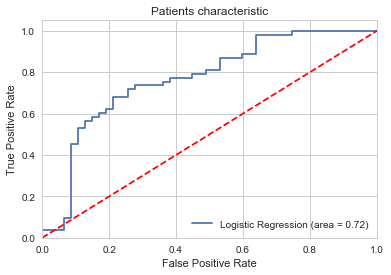

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Patients characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Conclusion

Logistic regression is a common tool for generating class probabilities and predictions. Although logistic regression models are simple and often insufficient to fully Capture relationships between variables in many predictive modeling tasks, they are a good starting point because simple models tend to not overfit the data.